# Project 8: Bernie Jones and Olivia Rigatti

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Part 0: GitHub Repo
    This portion of our project was created by Olivia per our discussion and I was added into this! Thanks Olivia!**

## **Part One: Timestamp Extraction
    This portion of the project was completed within an alternate notebook and pushed to github. This is reflected in our repository.** 

## **Part Two: Analyzing timestamp data for patterns**

In [3]:
df_olivia = pd.read_csv("olivia_timestamp.csv")
df_olivia.head()

,Unnamed: 0,timestamp
0,0,2023-10-13 14:54:39 UTC
1,1,2023-10-13 14:54:39 UTC
2,2,2023-10-13 14:45:59 UTC
3,3,2023-10-13 14:45:59 UTC
4,4,2023-10-13 14:42:57 UTC


In [4]:
#Checking type of our timestamp column. 
type(df_olivia["timestamp"][0])

str

In [5]:
#Knowing this, before we use .diff() we must convert things to datetime!
df_olivia["datetime"] = pd.to_datetime(df_olivia["timestamp"])
df_olivia["datetime"]

0       2023-10-13 14:54:39+00:00
1       2023-10-13 14:54:39+00:00
2       2023-10-13 14:45:59+00:00
3       2023-10-13 14:45:59+00:00
4       2023-10-13 14:42:57+00:00
                   ...           
61459   2018-01-04 03:07:44+00:00
61460   2018-01-04 03:04:01+00:00
61461   2018-01-04 03:04:01+00:00
61462   2017-12-16 17:41:00+00:00
61463   2017-12-16 17:41:00+00:00
Name: datetime, Length: 61464, dtype: datetime64[ns, UTC]

In [6]:
#Ensuring sorted in Chrnonological order
df_olvia = df_olivia.sort_values(by="datetime")
df_olivia["datetime"]
#Here we confirm that the end points have not changed, thought it was good to ensure these have been sorted!... 

0       2023-10-13 14:54:39+00:00
1       2023-10-13 14:54:39+00:00
2       2023-10-13 14:45:59+00:00
3       2023-10-13 14:45:59+00:00
4       2023-10-13 14:42:57+00:00
                   ...           
61459   2018-01-04 03:07:44+00:00
61460   2018-01-04 03:04:01+00:00
61461   2018-01-04 03:04:01+00:00
61462   2017-12-16 17:41:00+00:00
61463   2017-12-16 17:41:00+00:00
Name: datetime, Length: 61464, dtype: datetime64[ns, UTC]

In [7]:
df_olivia["time_diff"] = df_olivia["datetime"].diff()
df_olivia
#This confirms some interesting details here as there are time different elements that do not vary... this will be interesting to dif into more later.

,Unnamed: 0,timestamp,datetime,time_diff
0,0,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,NaT
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58
...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59


In [8]:
#Dropping null value(s)
df_olivia.dropna(inplace=True)

In [9]:
#Longest time between timestamps:
df_olivia["time_diff"].sort_values()

61240   -216 days +22:20:35
61231    -43 days +02:16:41
61254    -40 days +08:47:34
61124    -29 days +19:26:28
61462    -19 days +14:36:59
                ...        
32814       0 days 00:00:00
32810       0 days 00:00:00
32809       0 days 00:00:00
32828       0 days 00:00:00
61463       0 days 00:00:00
Name: time_diff, Length: 61463, dtype: timedelta64[ns]

WOAH! 216 days in between uses! 

Sidetangent: These o values seem a little odd!

In [10]:
#Average time between timestamps:
df_olivia["time_diff"].mean()

Timedelta('-1 days +23:10:10.187934205')

Interesting, almost an average of 24 hours in time differences! I wonder if there's some big chunks in this data?!

In [11]:
#Day with the most timestamps:
#First lets utilize DatetimeIndex:
df_olivia["days"] = pd.DatetimeIndex(df_olivia["timestamp"]).day
df_olivia

,Unnamed: 0,timestamp,datetime,time_diff,days
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00,13
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20,13
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00,13
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58,13
5,5,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,0 days 00:00:00,13
...,...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21,4
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17,4
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00,4
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59,16


In [12]:
#This is great but its kind of ambigous to just have the number, so lets now incorporate a new column month and then we will join these two together:
df_olivia["month"] = pd.DatetimeIndex(df_olivia["timestamp"]).month
df_olivia

,Unnamed: 0,timestamp,datetime,time_diff,days,month
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00,13,10
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20,13,10
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00,13,10
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58,13,10
5,5,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,0 days 00:00:00,13,10
...,...,...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21,4,1
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17,4,1
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00,4,1
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59,16,12


In [13]:
# And now by year!
df_olivia["year"] = pd.DatetimeIndex(df_olivia["timestamp"]).year
df_olivia


,Unnamed: 0,timestamp,datetime,time_diff,days,month,year
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00,13,10,2023
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20,13,10,2023
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00,13,10,2023
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58,13,10,2023
5,5,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,0 days 00:00:00,13,10,2023
...,...,...,...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21,4,1,2018
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17,4,1,2018
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00,4,1,2018
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59,16,12,2017


In [14]:
#Combing columns together to now be able to sort for each individual day!
df_olivia["combined_date"] = pd.to_datetime(df_olivia[["year", "month", "days"]])
df_olivia

,Unnamed: 0,timestamp,datetime,time_diff,days,month,year,combined_date
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00,13,10,2023,2023-10-13
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20,13,10,2023,2023-10-13
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00,13,10,2023,2023-10-13
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58,13,10,2023,2023-10-13
5,5,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,0 days 00:00:00,13,10,2023,2023-10-13
...,...,...,...,...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21,4,1,2018,2018-01-04
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17,4,1,2018,2018-01-04
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00,4,1,2018,2018-01-04
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59,16,12,2017,2017-12-16


In [15]:
#Note this may have been unconventional practice but the datetime/datetimeindex formatting was slightly confusing to work with and sorting to begin with was a challenge. 
#Determining which date has the most occurences!
df_olivia["combined_date"].value_counts().sort_values(ascending=False)

2023-09-07    190
2022-10-02    168
2022-10-13    168
2023-03-01    166
2021-12-04    164
             ... 
2018-05-12      1
2023-09-23      1
2018-01-12      1
2018-02-14      1
2021-01-04      1
Name: combined_date, Length: 1373, dtype: int64

We now see that September 7, 2023 had the most occurences (timestamps) with 190!

In [16]:
#Now we want to determine which month had the most values. So this time let's create a column and sort by Month and Year!
df_olivia["combined_month"] = df_olivia["combined_date"].dt.to_period('M')
#GPT was utilized in this section as was having issue in generating how to sort by just month included with year as well to get accurage count of each month and year combination to remove the issue of repeating months. the .dt accessess the datetime accessor while .to_period('M') converts each datetime to a monthly frequency. We then do a similar sort as before. 

# Now our dataframe has a new column ("combined_month) that we can sort from!
# You can also sort by month and year
df_olivia["combined_month"].value_counts().sort_values(ascending=False)


2022-10    2441
2023-09    2434
2023-04    2418
2023-02    2315
2022-12    2230
           ... 
2018-03      11
2018-12       9
2019-04       6
2018-04       2
2017-12       2
Freq: M, Name: combined_month, Length: 65, dtype: int64

At this point I have now realized I accidentally called the timestamp column instead of the created datetime column! This probably complicated things a bit more! Let's now do this starting from the datetime column to verify our results!

In [17]:
df_olivia["day_2"] = pd.DatetimeIndex(df_olivia["datetime"]).day
df_olivia

,Unnamed: 0,timestamp,datetime,time_diff,days,month,year,combined_date,combined_month,day_2
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00,13,10,2023,2023-10-13,2023-10,13
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20,13,10,2023,2023-10-13,2023-10,13
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00,13,10,2023,2023-10-13,2023-10,13
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58,13,10,2023,2023-10-13,2023-10,13
5,5,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,0 days 00:00:00,13,10,2023,2023-10-13,2023-10,13
...,...,...,...,...,...,...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21,4,1,2018,2018-01-04,2018-01,4
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17,4,1,2018,2018-01-04,2018-01,4
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00,4,1,2018,2018-01-04,2018-01,4
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59,16,12,2017,2017-12-16,2017-12,16


At this point I began to see things would be operating pretty similar to before and that ultimately it was okay my process from above as the key component in distinguishing things in my mind is not having repeating dates across years (meaning each date is seperate). At this point in time I will be interested to compare with my partner as my interpretations of the directions may have been different than theirs. 

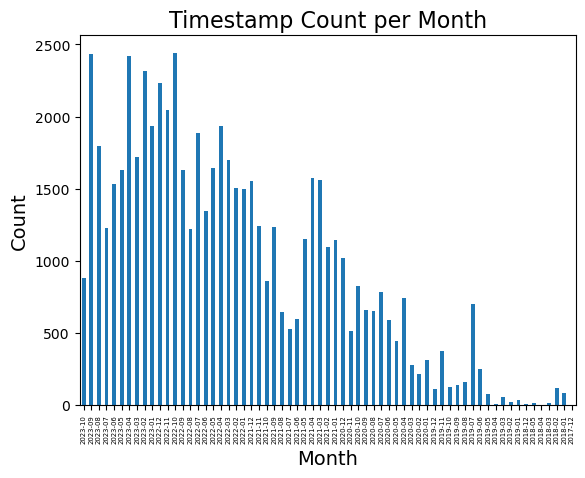

In [18]:
#Let's now visualize our data:
plot_olivia = df_olivia["combined_month"].value_counts().sort_index(ascending=False).plot(kind='bar')
#When first plotting, noticed the x-axis ticks overlapped. Consulted with resources to fix this!
plot_olivia.tick_params(axis='x', labelsize = 5)
plt.title("Timestamp Count per Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

While this barchat is a heaping mass it is great to visualize the counts per month! While simplistic in nature it paints an intersting picture when placed into chronological order! There's a lot higher counts in recent times. For example, in the past year, there was a decrease in counts furing summer months compared to earlier in the year!... This makes me wonder if this may be linked to having free time or being used as a background at times for studying...

What source is this?:
    I think this data may be from a music streaming service. The aspects of these timestamps that make me feel this way are the high values of counts on days which could be potentially as this is on a per track basis. If it is my partners preference to listen to music while studying it might further make sense why there appears to be higher counts outside of summer months. Entering into college and having more time to listen to music may also be represented in this or the service itself become more utilized by Olivia!

Partner Feedback: 
    WOW! Olivia's music comes from Amazon music and was pretty surprised by what her data reflected. She divulged that her old car prior to college didn't have a hookup so she primarly listened to the radio instead of through her streaming service. This could potentially explain the uptick in play counts in recent time. We both agreed some of Olivia's spikes may be due to time of year and loads of work she has at a given moment in addition to her increased usage of Amazon music in college (greater than high school). Olvia's analysis of my timestamp data was interesting as at first she thought it was video streaming data before beliving that it was music related but it did match a lot of preconceived notions of myself!

## **Part Two: Olivia's Information**
 

In [20]:
df_bernie = pd.read_csv('bernie_timestamps.csv')

In [21]:
type(df_bernie['Date Played'][0])

numpy.int64

In [22]:
# Creates new column with data in datetime format now
df_bernie['Timestamp'] = pd.to_datetime(df_bernie['Date Played'], format = '%Y%m%d')

In [23]:
# Examines new columns
df_bernie.head()

,Unnamed: 0,Date Played,Timestamp
0,0,20200726,2020-07-26
1,1,20200726,2020-07-26
2,2,20200726,2020-07-26
3,3,20200726,2020-07-26
4,4,20200726,2020-07-26


The data appears to already be sorted in descending order, but just to make sure it is (for the next part of the project) the code below sorts the Date Time column in descending order. 

In [24]:
# Sorts values in ascending order
df_bernie['Timestamp'].sort_values()

0       2020-07-26
106     2020-07-26
107     2020-07-26
108     2020-07-26
109     2020-07-26
           ...    
63901   2023-10-21
63902   2023-10-21
63903   2023-10-21
63896   2023-10-21
63923   2023-10-21
Name: Timestamp, Length: 63924, dtype: datetime64[ns]

No we want to make a new column that tells us the time since between a timestamp and the previous one. 

In [25]:
# Creates new column that tells us the time since the previous timestamp
df_bernie['Difference'] = df_bernie['Timestamp'].diff()

In [26]:
# Displays the dataframe so we can see the new column
df_bernie.head()

,Unnamed: 0,Date Played,Timestamp,Difference
0,0,20200726,2020-07-26,NaT
1,1,20200726,2020-07-26,0 days
2,2,20200726,2020-07-26,0 days
3,3,20200726,2020-07-26,0 days
4,4,20200726,2020-07-26,0 days


For question 3 of this part of the project we want to find the longest time between timestamps and the average time between timestamps.

In [27]:
# Finds the maximum time between timestamps  
diff_max = df_bernie['Difference'].max()

# Prints the result
print(diff_max)

5 days 00:00:00


In [28]:
# Finds the average time between timestamps
diff_mean = df_bernie['Difference'].mean()

# Prints the result
print(diff_mean)

0 days 00:26:37.622139136


From the results above we can see that the maximum time between timestamps is five days. We can also see that the average time between time stamps is zero days. 

Now we want to find the day with the most timestamps and how many events occureed on that day. We also want to find the month with the most events and how many events were in that month. Because my timestamp data does not include hour that the event occurred I can just look at the value counts of the timestamp and see what has the most occurences to get the day with the most timestamps. 

In [29]:
# Counts values for the timestamps
df_bernie['Timestamp'].value_counts()

2020-10-14    400
2021-09-09    349
2020-12-05    328
2020-09-27    297
2021-08-13    271
             ... 
2022-11-21      1
2022-11-22      1
2023-05-03      1
2023-01-29      1
2021-05-30      1
Name: Timestamp, Length: 1133, dtype: int64

From the results above we can see that the day withe the most events was October 14th 2020. On this day there were 400 events. Now let's see what month ha shte msot timestamps. 

In [30]:
# Creates a ne column with just the month and the year of the timestamp
df_bernie['Months'] = df_bernie['Timestamp'].dt.strftime('%Y-%m')

In [31]:
# Counts the month values to see which month had the most timestamps
df_bernie['Months'].value_counts()

2020-10    3271
2020-09    3004
2020-11    2921
2021-07    2831
2021-12    2788
2020-12    2690
2021-11    2506
2021-09    2473
2021-03    2472
2021-06    2460
2022-01    2401
2021-08    2384
2021-02    2301
2020-08    1957
2021-04    1744
2021-05    1685
2022-07    1638
2021-10    1619
2022-06    1571
2022-03    1503
2021-01    1409
2022-05    1376
2022-04    1335
2022-02    1228
2022-08    1207
2023-09    1110
2023-07    1084
2022-12     997
2023-06     979
2022-11     878
2022-09     767
2023-05     743
2023-08     716
2023-01     689
2023-03     688
2022-10     572
2023-10     514
2023-02     497
2020-07     493
2023-04     423
Name: Months, dtype: int64

We can see from the data above that the month with the most timestamps was October 2020 with 3,271 events. Now what about the month with the most events over the entire period of the data.

In [32]:
# Extracts month from the datetime information
df_bernie['Month'] = df_bernie['Timestamp'].dt.month

In [33]:
# Looks at the value counts for the months
df_bernie['Month'].value_counts()

9     7354
12    6475
11    6305
8     6264
7     6046
10    5976
6     5010
3     4663
1     4499
2     4026
5     3804
4     3502
Name: Month, dtype: int64

So if we don't look at the year, over the entire time period we can see that September is the month with the most timestamps. In all the Septembers there were 7,354 events. 

Okay, now let's visualize the data and see what we can learn from it. 

Text(0.5, 1.0, 'Count for 2020')

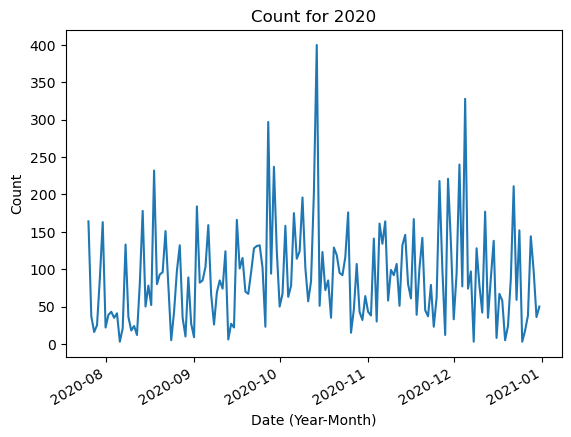

In [34]:
# Plots the number of occurrences for each month over 2020
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2020)].unique()].plot(kind='line')

# Creates x-label, y-label, and title for graph
plt.xlabel('Date (Year-Month)')
plt.ylabel('Count')
plt.title('Count for 2020')

From the graph above we can see that the most events in 2020 appear to have happened in September. 

Text(0.5, 1.0, 'Count for 2021')

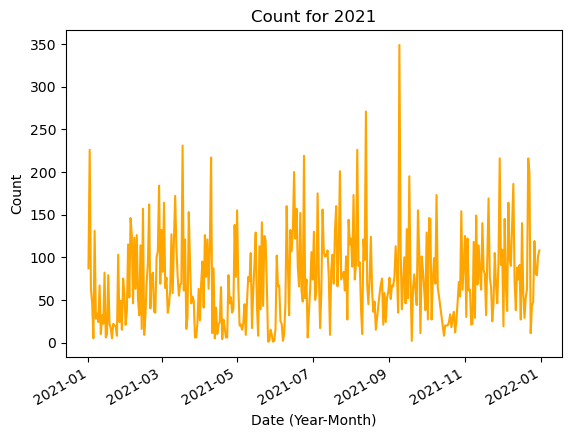

In [35]:
# Plots the number of occurrences for each month over 2021
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2021)].unique()].plot(kind='line', color = 'orange')

# Creates x-label, y-label, and title for graph
plt.xlabel('Date (Year-Month)')
plt.ylabel('Count')
plt.title('Count for 2021')

From the graph for 2021 it looks like the most events happened in October. We can also see that the max number of events in 2021 is smaller than the max number in 2020, as the y-axis max value is smaller. 

Text(0.5, 1.0, 'Count for 2022')

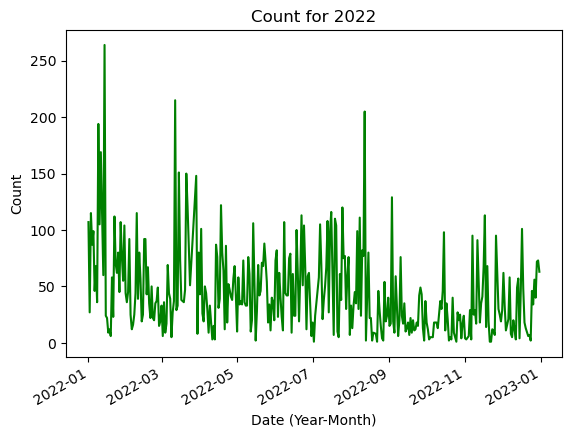

In [36]:
# Plots the number of occurrences for each month over 2022
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2022)].unique()].plot(kind='line', color = 'green')

# Creates x-label, y-label, and title for graph
plt.xlabel('Date (Year-Month)')
plt.ylabel('Count')
plt.title('Count for 2022')

In 2022 the most events seem to have happened in the Janurary February time frame. However, we can see that there was a spike in events right before September. Once again, the max y-value is smaller for this year than the previous year. 

Text(0.5, 1.0, 'Count for 2023')

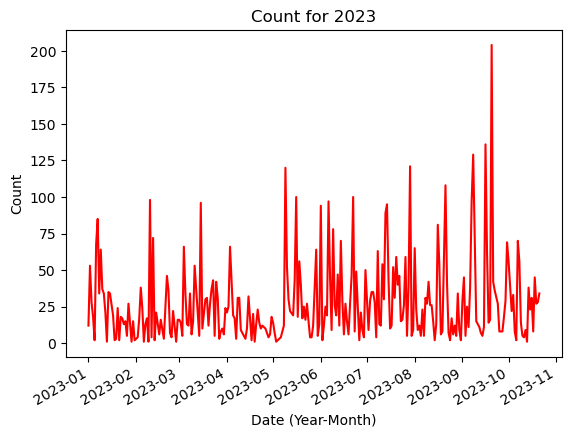

In [37]:
# Plots the number of occurrences for each month over 2023
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2023)].unique()].plot(kind='line', color = 'red')

# Creates x-label, y-label, and title for graph
plt.xlabel('Date (Year-Month)')
plt.ylabel('Count')
plt.title('Count for 2023')

From the graph for 2023 we can see that the month witht he most events is October. Again, the max y-value is smaller than that of the prvious year. 

Text(0.5, 1.0, 'Count for 2020-2023')

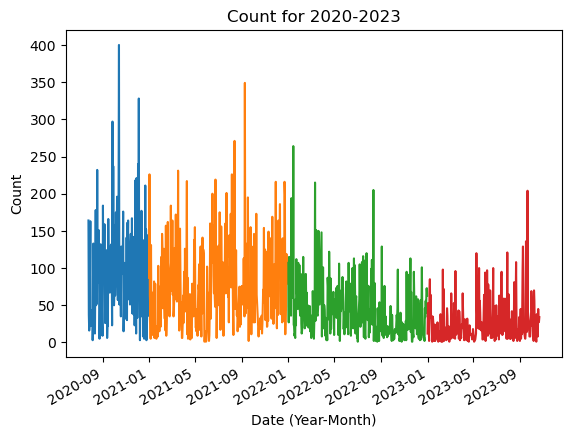

In [38]:
# Plots the number of occurrences for the entire time period of data
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2020)].unique()].plot(kind='line')
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2021)].unique()].plot(kind='line')
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2022)].unique()].plot(kind='line')
df_bernie['Timestamp'].value_counts()[df_bernie['Timestamp'][(df_bernie['Timestamp'].dt.year == 2023)].unique()].plot(kind='line')

# Creates x-label, y-label, and title for graph
plt.xlabel('Date (Year-Month)')
plt.ylabel('Count')
plt.title('Count for 2020-2023')

In conjunction with the previous graphs, and the one above, we can see that over the past three years the number of events have been declining. However, it seems that there is normally a spike in events around September or October with some lulls in the early summer months and late spring months. 

From the questions I have ansered about the timestamp data, and the graphs I have made, I think the data is for some type of entertainment source, potentially a music service. Because some events occurred five days apart this leads me to beleive it is not location data. Although phones can get turned off or put into airplane mode, to not have your phone for five days would seem unlikely. 

My next thought was that it might be Netflix/tv service data because a lot of people seemed to request that sort of data from the jamboard we did in class. However, once I saw the max number of events in a day I decided agaisnt this. I figured Netflix probably collecetd time data for the start time or end time of watching a tv show or movie. As the max events in a day was 400 I thought it would be extremely unliekly that Bernie had somehow managed to watch 400 episodes of a tv show in one day. However, it is much easier to listen to that amount of songs, especially if the data is recording the songs that you skipped as song that were played. 

I also think it might be music data because of the trends the events follow. It seems like more events occurr during school periods than over breaks. I know that I personally listen to music more at school, because I want entertainment while I do my homework, than when I am on break and can spend more time doing other activites. I am unsure about how to factor in the decline of events of the years into my analysis, and the fact that 2020 had the most events was not very helpful as lots of people started doing more at home leisure actitives during this time period. 

I could make a better guess as to what the data was if I had the hour and time it was played. As the timestamp only included the date it was played, and not the time, I was unable to see how long each event lasted for. If the events were spaced roughly 2.5-3 minutes apart it might support my theory that this is music data. However, if all the events were 30 seconds apart I might rethink what the source of data is.   

Partner Feedback: My guess was correct, it was music data. It turns out Bernie's data was from Apple Music. He seemed slightly suprised that his music listening had gone down a little at first but then he talked about how he sometimes listens to podcsts when he drives instead of music. Bernie seemed to agree that some of the spikes corresponded to school and that music lsitneing might uptick a little bit right when he gets to school. 

Seeing his analysis of my data was really crazy. I never realized how much less music I listened to in high school! Once I thought about it a little more though it made a lot of sense because I would just listen to the car radio when I drove to and from school. Also, I did not listen to music when I studied, while I do that now. 

### **END OF OLIVIA'S WORK**

## **Part Three: Creating the Combined Visualization**

In [39]:
#Before we create our visualization, let's Examining Olivia's work
df_bernie.head()

,Unnamed: 0,Date Played,Timestamp,Difference,Months,Month
0,0,20200726,2020-07-26,NaT,2020-07,7
1,1,20200726,2020-07-26,0 days,2020-07,7
2,2,20200726,2020-07-26,0 days,2020-07,7
3,3,20200726,2020-07-26,0 days,2020-07,7
4,4,20200726,2020-07-26,0 days,2020-07,7


In [40]:
df_olivia

,Unnamed: 0,timestamp,datetime,time_diff,days,month,year,combined_date,combined_month,day_2
1,1,2023-10-13 14:54:39 UTC,2023-10-13 14:54:39+00:00,0 days 00:00:00,13,10,2023,2023-10-13,2023-10,13
2,2,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,-1 days +23:51:20,13,10,2023,2023-10-13,2023-10,13
3,3,2023-10-13 14:45:59 UTC,2023-10-13 14:45:59+00:00,0 days 00:00:00,13,10,2023,2023-10-13,2023-10,13
4,4,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,-1 days +23:56:58,13,10,2023,2023-10-13,2023-10,13
5,5,2023-10-13 14:42:57 UTC,2023-10-13 14:42:57+00:00,0 days 00:00:00,13,10,2023,2023-10-13,2023-10,13
...,...,...,...,...,...,...,...,...,...,...
61459,61459,2018-01-04 03:07:44 UTC,2018-01-04 03:07:44+00:00,-1 days +23:55:21,4,1,2018,2018-01-04,2018-01,4
61460,61460,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,-1 days +23:56:17,4,1,2018,2018-01-04,2018-01,4
61461,61461,2018-01-04 03:04:01 UTC,2018-01-04 03:04:01+00:00,0 days 00:00:00,4,1,2018,2018-01-04,2018-01,4
61462,61462,2017-12-16 17:41:00 UTC,2017-12-16 17:41:00+00:00,-19 days +14:36:59,16,12,2017,2017-12-16,2017-12,16


This is great! Despite having different field names we have a common instance of Month/Year of which we can work with. Lets use this for visualizing our uses of music streaming services since we share the same general discipline of use!

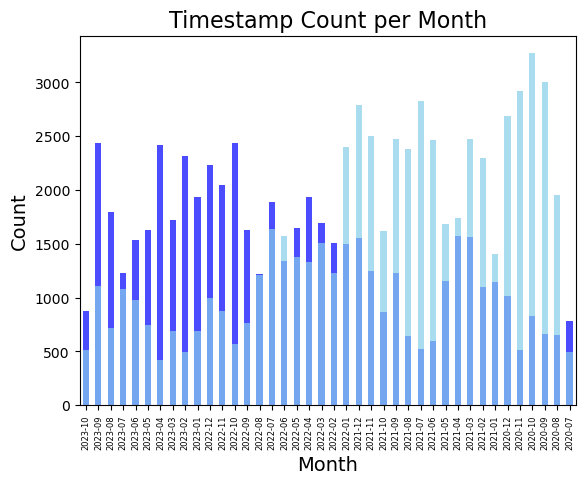

In [41]:
#Let's graphically look at things by month between Olivia and I!
plot_olivia = df_olivia["combined_month"].value_counts().sort_index(ascending=False).plot(kind='bar', color='blue', alpha=0.7)
plot_bernie = df_bernie["Months"].value_counts().sort_index(ascending=False).plot(kind='bar', color='skyblue', alpha=0.7)
plot_bernie.tick_params(axis='x', labelsize = 6)
plt.title("Timestamp Count per Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()
#This plot limits to the later of the two listening starts in this case my first timestamp listening on apply music in July 2020. 

This barchart counts timestamps per month for Olivia and myself from July 2020. What's incredibly interesting to see is the inversion of listening from the two of us. I myself was more involved in listening earlier into these range of dates as opposed to Olivia who has listened at greater amounts in the more recent times! As previously discussed this really fits with our "stories" of our relationship with our music streaming service providers. I myself largely listen to podcasts or youtube outside of driving around in my car, a shift that has happened over more recent times. This is contrasted by Olivia's emerging use of her device in greater volumes in recent times (college tenure). In large part this serves to reflect time spent in college and personal tastes. 

## **Part Four: Personal Data**
There are two questions I'd love to first identiy from my data: What song have I played the most over my time with apple music? This serves as the overarching question for a series of subquestions which will additionally examine what the average amount of plays for each song is. I'm greatly interested in this as I have a gameday playlist which I utilize often on gamedays and even at times for practice. Thus I often listen to the same songs over and over. My second question will tackle play duration and look at skips and durations listened, to obtain a better understanding of potentially my attention span when it comes to my music listening. Lastly I will examine who my most listened to artist is (by play count), visualize this and also postulate a little on if the artist(s) have a significant number of tracks listened to in my track history (number of songs). Per request code has been ommited from this section and was worked with in a different jupyter notebook (same as timestamp). 

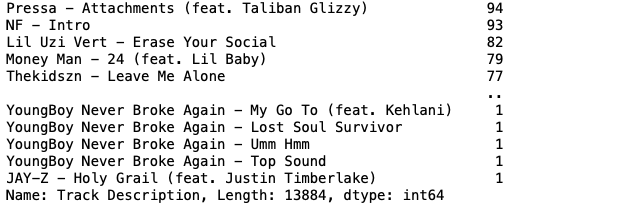

To determine which songs has the highest play count I utilize both value_counts and sort_values in a descending manner on a column column title left ambigous just out of privacy concern-willing to divulge if needed) to extract both the Artist and Song-title with its playcount. Funnily enough my top song is the song that all throughout my Freshman year captivated the attention of myself and my teammates in our Jewett Hall Athlete Only Dorm Floor! Good memories!! While 94 plays is certainly a lot, I then wanted to tackle my next question of how many average plays are there in my history. Utilizing a value counts and taking the mean I learned of an average of 4.6 roughly 5 plays. I've got a lot of music downloaded so all in all not too surprising. 

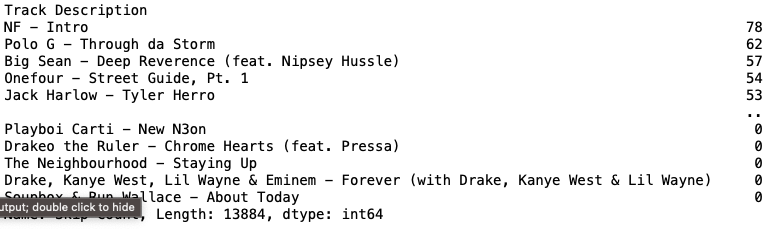

Shifting gears, I now attempt to further tackle my listening habbits looking at songs with the most skips! Utilizing a group by featuring grouping by track description, I look at skip counts and sum these values and then sort them. Here I learned that surprisingly one of my most played songs is my most skipped in the form of NF's Intro. Here I am not overly surprised as this is the first song on my gameday playlist so oftentimes it gets skipped! Next I attempted to look at average length of song (durations listened). To do so I created multiple columns worth of manipulation from milliseconds to seconds to minutes for each instance of data. Here things got slightly more interesting as each instance has a column for play count, which seemed to indicate and effect duration played. Thus for the sake of aggregate studying for the average I made the following decisions/assumption(s): "In certain instances we are playing songs repeatedly and thus the duration does not accurately reflect the time length of each song played. Let's now adjust each column by creating a new column which takes the approximate minutes listened two and divdies by the play count. It is also work noting that in some cases this song could be getting cut early via a skip or something of that sort. We however are just looking for a rough estimate here and this will suffice. To be very precise we could filter for songs that qualify as ended due the "natural end of track" and then make division. For simplicities sake however as we are looking for rough estimates of times listened to we will take the average of the playcounts." With this framework in mind we then took the average of each song opting to omit values that were NaN due to being instances of immediately skipping the song. This brought about an average of 2.49 minutes, which may reflect shorter songs but also understanding the generalizations made to deduce this result could indicate tendencies to skip songs earlier than their ending... something I've always been accussed of by those who put me on AUX! (chuckles)


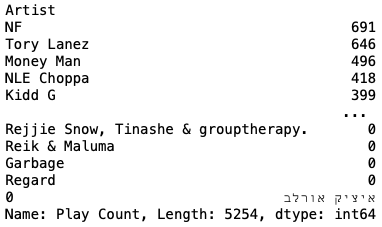

Now with the end goal of visualizing my Apple Music Data a little further we shift towards looking at Artists with the highest playcounts with the intention of later looking at Artists that 'feature' the most in my listening history. Similar to before we use a groupby, summing, and sorting values to find out who these artists are. But before this we created two new columns by extracting both the Artist name and the Song Title from one field. We did so by doing a nift extraction that leverages Apple Music's description system with a "-" as our key for splitting the string! We do make an assumption here: "We also will not incorporate featuring artists into this discussion (thus kept included in the song title...we could also extract this as well if analysis warranted it)". Off of this work we see that NF is my most 'played' artist. I'm not too surprised by this result as again a lot of his music is also on my playlists and in general I've been a huge fan. Tory Lanez as well, but given recent legal battles we won't mention him in too great of lengths. We visualize this list below in the following visualization. We choose to just visualize the top five due to the breath of artists that we determine. This also exposes some dispartiy in my listening tastes as I have a gambit of Rap, R&B, and even pseudo Country just in this top five. The disparity in counts is also worth noting as even from first plae to forth place is almost a 300 play difference! This really doesn't surprise me as I have my preferences and also listen to a lot of different artists. So some get a lot more attention than others. I've actually seen this reflected before in my Apple Music Replay that apple provides near the end of every year. 

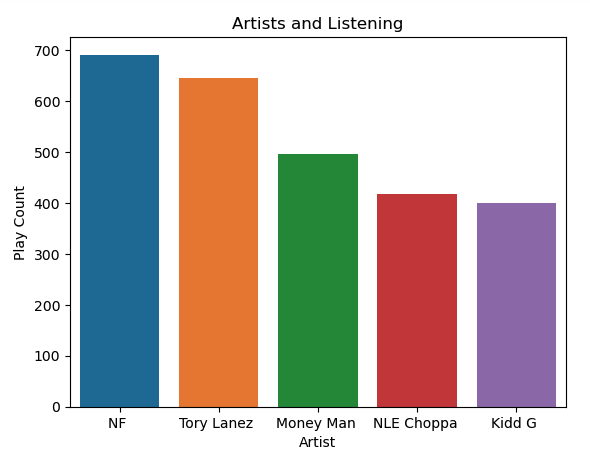

Wrapping up our analysis of artists, I wanted to examine how many different songs appear in my play history per artist. These values seem somewhat inflated so I have some slight skepticism however these are all artists that I routinely add the entirety of their album to listen to upon coming out so this also shouldn't be too surprising! Interestingly to this point Tory Lanez appears both in my top five in play count and in song count (see below and above). This count was done by summing the unique identifiers for each track taking the unique count of each artist (see below). This pushes the narrative that I listen to a lot of music to say the least despite not actually listening to it that consistently. 

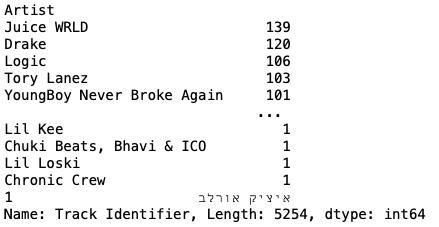

In total the exercises performed from this apple music expose quite a lot about my listening tastes. The depth of information apple provides is tremendously useful however with this depth comes at times complexity that isn't easily documented in their data documentation. This leads to the decision for the scope of this project to make certain assumptions that with further time could be relaxed/trained further to reflect some of the nuances of my data. For the scope of these exercises and intentions however these assumptions hold for meaningful insight! 

## Part 4: Olivia - Analyze and visualize an additional element from  your personal data

The data I decided to use was my Amazon Music listening data. I decided that i wnated to answer the following questions:

1. What is the average amount of time I listen to a song? What is the longest and what is the shortest?

2. What is the most popular song that I skip? Do I skip this song more than I listen to it? 

The data for how long I listen to a song was given to me in milliseconds. To answer my first question I created a new column in my datafram where I converted the time from milliseconds to minutes. To do this I used the conversion (milliseconds/1000)/60. Once I created this new column (which I named Minutes) I used .max(), .mean(), and .min() to find the max, mean, and min time I spent listeng to a song. 

I found that the longest I have listened to a song is 23.55 minutes. The shortest time I have spent listening to a song is 0.0 minutes. I believe this is from me skipping songs right away or stopping them right when they start. The average time I spend listening to a song is 2.66 minutes. I feel like most of the songs I listen to are longer than 2.66 minutes but I do skip songs a lot, so taking that into account I think this statistic makes sense. 

For my next question I created a new dataframe that filtiered for songs that I skipped. Once I had this dataframe I used value_counts() to see the number of times I skipped certain songs. I found that my most skipped song is Hotel California by the Eagles. This made me curious about my top skip every year, so I then created new dataframes that filtered for songs that I skipped in specific years. So I made a dataframe for each year from 2018 to 2023. I found that the last two years Hotel California was my top skipped song and the two years before that, while not the most skipped song, it was in the top five. I then wanted to know if I skipped this song more than I listened to it. To do this I created a new dataframe that only had songs with Hotel California as the title. I then looked at the value counts for the termination reason and calculated the percent of time I skip the song and listen to it all the way through. I found that I skip the song 26% of the time and let it finish 39% of the time. So, to answer my original question, I do not skip the song more than I let it finish. 

For my visualization I decided to look at the hours I listen to music. I feel like there are specific times I tend to listen to music, because I have a pretty regular routine for my days, and wanted to see if when I though I listened to music the most matched the data. The graph below shows the song count for every hour over the time period of my data. 

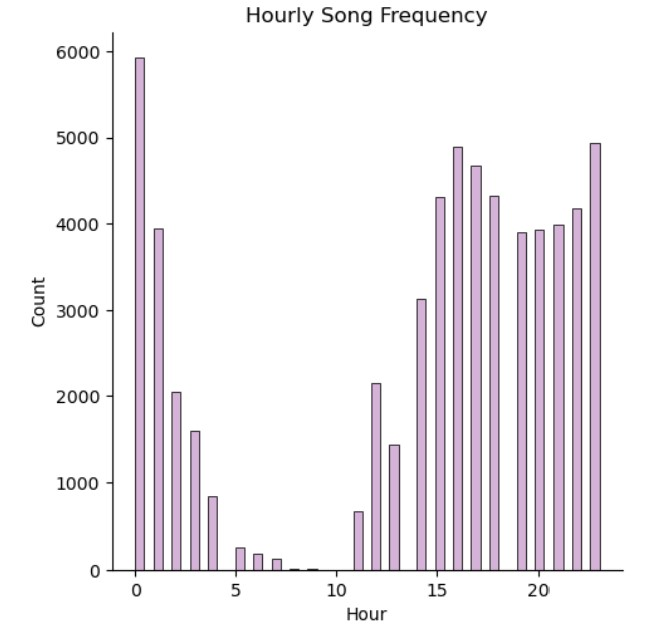

From the graph we can see that my most popular listening hour is 0:00. This is UTC time which translates to 4:00 pm PST. My next most popular time to listen to music is 23:00 UTC which is 3:00 pm PST. I was suprised to fin this out. This was initially suprising as I thought I would have listened to the most music in the mornings, probably around 9 or 10, because I always listen to music when I work out. However, upon further relfection I realized I tend to listen to music when I do homework or go on walks, which are thigns I tend to do around 3:00 or 4:00. 